<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <link rel="stylesheet" href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap">
</head>

<body>

<div style="background-color: #65BF6F; color: black; text-align: center; padding: 10px; font-family: 'Roboto', sans-serif; font-size: 24px">
    

<div style="text-align:center;">
    <img src="Jaki_Charrua_gatodelespacio.jpg" alt="Drawing" style="width:150px; border-radius:90%;"/>
    
    
</div> 


<body>


    
</html>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <link rel="stylesheet" href="https://use.typekit.net/your-typekit-id.css">
</head>
<body>
    
    
<div style="background-color: #000000; color: white; text-align: center; padding: 10px; font-family: 'Proxima Nova', sans-serif; font-size: 24px;">
    Replication Lab  <br>
    GEC0319 | Time Series <br>
    
    
</div>



    
    
</body>
</html>

## **Pearson Correlation** 
- Experiment N° **0**  
- Link: [here](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

#### Design

>*Synthetic data to test the limits of Pearson Correlation.*

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)

# general settings
class CFG:
    data_folder = '../input/tsdata-1/'
    img_dim1 = 20
    img_dim2 = 10
    style = 'fivethirtyeight'


    
# adjust the parameters for displayed figures    
plt.rcParams.update({'figure.figsize': (CFG.img_dim1,CFG.img_dim2)})    

plt.style.use(CFG.style)

In [4]:
x_simple = np.array([-2, -1, 0, 1, 2])
y_simple = np.array([4, 1, 3, 2, 0])
my_rho = np.corrcoef(x_simple, y_simple)

print(my_rho)

[[ 1.  -0.7]
 [-0.7  1. ]]


In [5]:
seed = 13
rand = np.random.RandomState(seed)

x = rand.uniform(0,1,100)
x = np.vstack((x,x*2+1))
x = np.vstack((x,-x[0,]*2+1))
x = np.vstack((x,rand.normal(1,3,100)))

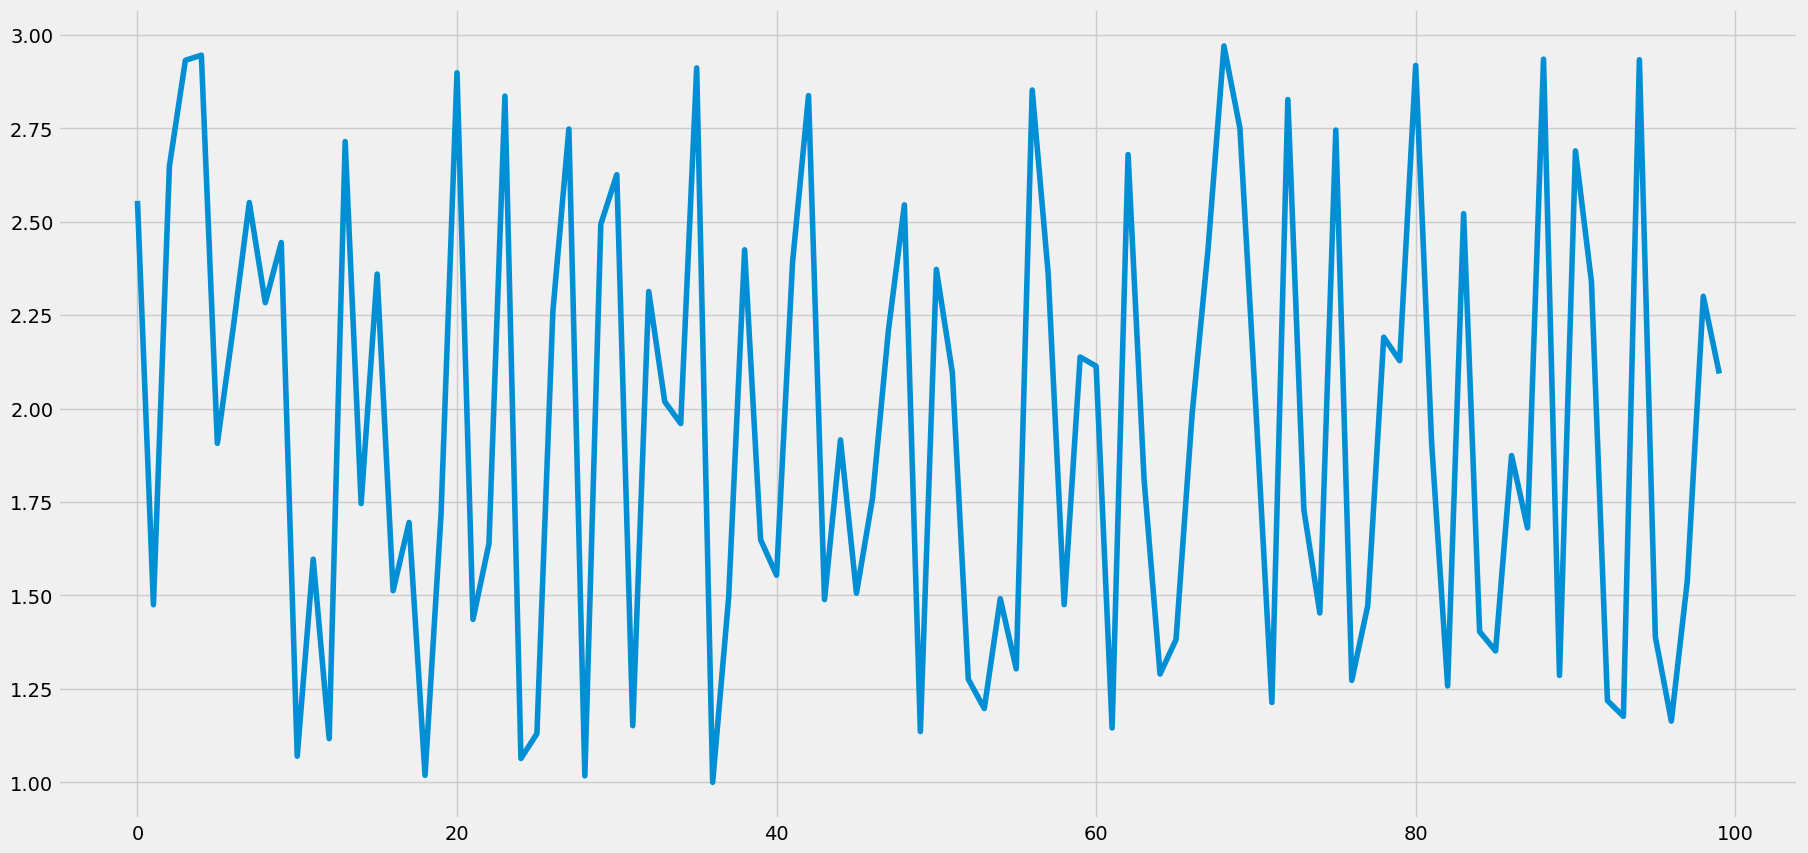

In [6]:
plt.plot(x[1])

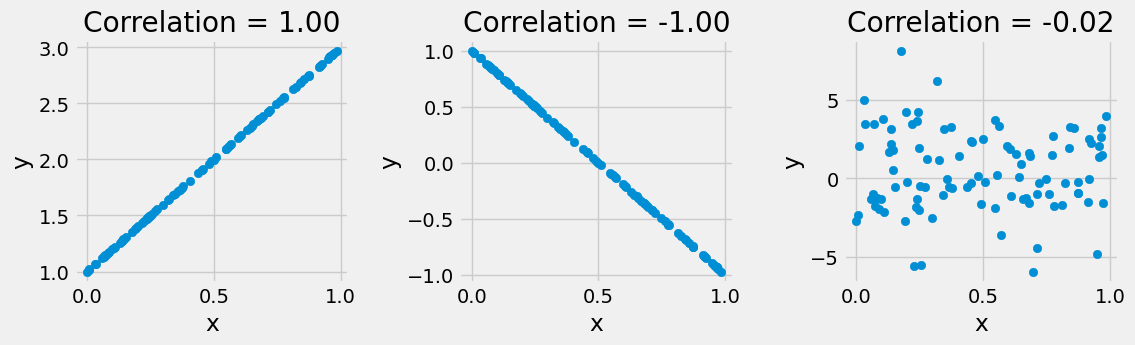

In [7]:
rho = np.corrcoef(x)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
for i in [0,1,2]:
    ax[i].scatter(x[0,],x[1+i,])
    ax[i].title.set_text('Correlation = ' + "{:.2f}".format(rho[0,i+1]))
    ax[i].set(xlabel='x',ylabel='y')
fig.subplots_adjust(wspace=.4)    
plt.show()

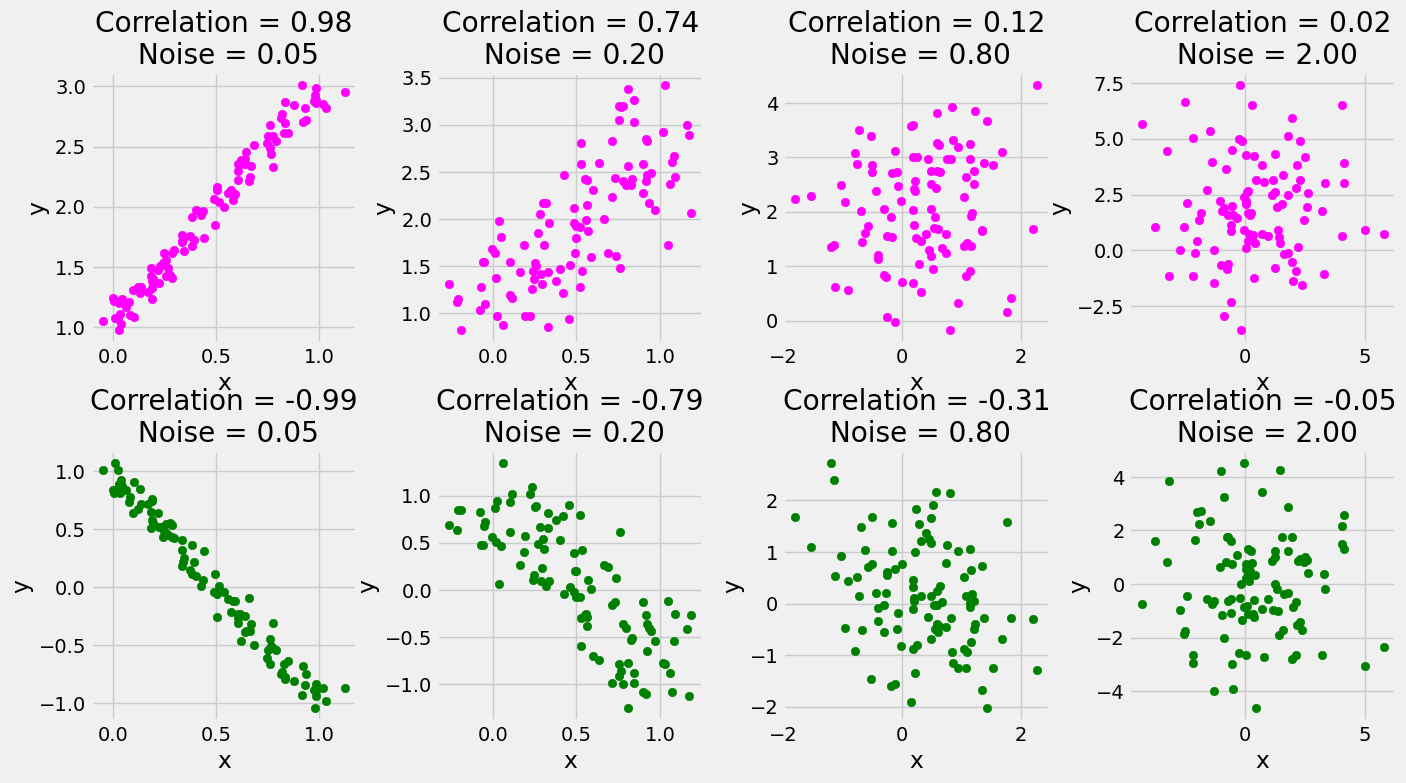

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

for noise, i in zip([0.05,0.2,0.8,2],[0,1,2,3]):
    # Add noise
    x_with_noise = x+rand.normal(0,noise,x.shape)
    
    # Compute correlation
    rho_noise = np.corrcoef(x_with_noise)
    
    # Plot column wise. Positive correlation in row 0 and negative in row 1
    ax[0,i].scatter(x_with_noise[0,],x_with_noise[1,],color='magenta')
    ax[1,i].scatter(x_with_noise[0,],x_with_noise[2,],color='green')
    ax[0,i].title.set_text('Correlation = ' + "{:.2f}".format(rho_noise[0,1])
                        + '\n Noise = ' + "{:.2f}".format(noise) )
    ax[1,i].title.set_text('Correlation = ' + "{:.2f}".format(rho_noise[0,2])
                        + '\n Noise = ' + "{:.2f}".format(noise))
    ax[0,i].set(xlabel='x',ylabel='y')    
    ax[1,i].set(xlabel='x',ylabel='y')
    
fig.subplots_adjust(wspace=0.3,hspace=0.4)    
plt.show()

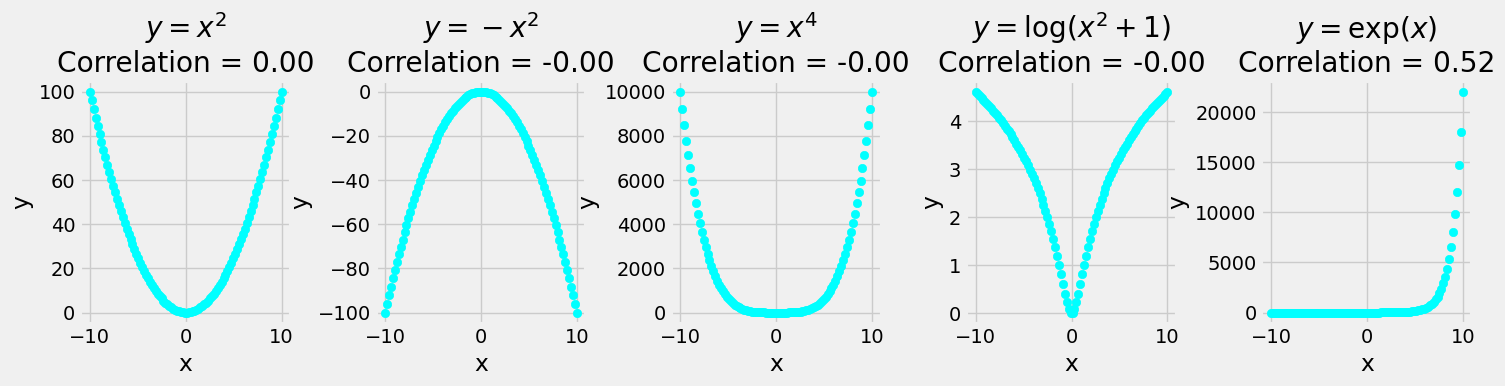

In [9]:
# Create a data matrix
x_nonlinear = np.linspace(-10,10,100)
x_nonlinear = np.vstack((x_nonlinear,x_nonlinear*x_nonlinear))
x_nonlinear = np.vstack((x_nonlinear,-x_nonlinear[0,]**2))
x_nonlinear = np.vstack((x_nonlinear,x_nonlinear[0,]**4))
x_nonlinear = np.vstack((x_nonlinear,np.log(x_nonlinear[0,]**2+1)))
x_nonlinear = np.vstack((x_nonlinear,np.exp(x_nonlinear[0,])))

# Compute the correlation
rho_nonlinear = np.corrcoef(x_nonlinear)

# Plot the data
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(16, 3))
title = ['$y=x^2$','$y=-x^2$','$y=x^4$','$y=\log(x^2+1)$','$y=\exp(x)$']
for i in [0,1,2,3,4]:
    ax[i].scatter(x_nonlinear[0,],x_nonlinear[1+i,],color='cyan')
    ax[i].title.set_text(title[i] + '\n' + 
                         'Correlation = ' + "{:.2f}".format(rho_nonlinear[0,i+1]))
    ax[i].set(xlabel='x',ylabel='y')
fig.subplots_adjust(wspace=.4)    
plt.show()